In [20]:
import numpy, os
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.metrics import confusion_matrix, accuracy_score
from scipy.stats import mode
from keras.models import Model, Sequential
import matplotlib.pyplot as plt
from keras.utils import load_img
from keras.layers import Input, Dense, Conv2D, UpSampling2D, Conv2DTranspose, Flatten, MaxPooling2D, BatchNormalization, Dropout
from helpers import loadData

In [21]:
X,y = loadData('train')
Xt, yt = loadData('test')
print(X[0].shape)

(32, 32, 3)


[[[-0.11970231 -0.13146701 -0.10009446]
  [-0.19029054 -0.15891799 -0.17460427]
  [-0.19029054 -0.18244741 -0.17460427]
  ...
  [ 0.03323887  0.00578789 -0.02950623]
  [ 0.07245455  0.05284671 -0.02558466]
  [ 0.09990554  0.06068985 -0.01774152]]

 [[-0.13931015 -0.0961729  -0.11185917]
  [-0.19421211 -0.15107486 -0.16283956]
  [-0.19421211 -0.1706827  -0.18244741]
  ...
  [-0.09225133 -0.0961729  -0.05303564]
  [ 0.01363103 -0.02166309 -0.0451925 ]
  [ 0.07637612  0.05676828 -0.01381996]]

 [[-0.09225133 -0.08832976 -0.10009446]
  [-0.17852584 -0.16676113 -0.14715329]
  [-0.18636897 -0.18244741 -0.15891799]
  ...
  [-0.15891799 -0.13538858 -0.07264348]
  [-0.11185917 -0.08440819 -0.07656505]
  [ 0.03323887  0.02147416 -0.04127094]]

 ...

 [[ 0.08814083  0.06853299  0.04500357]
  [ 0.0920624   0.07245455  0.0293173 ]
  [ 0.07245455  0.06068985  0.00578789]
  ...
  [ 0.15872906  0.15872906  0.0920624 ]
  [ 0.15872906  0.16265063  0.06853299]
  [ 0.1548075   0.16265063  0.05676828]]

 [

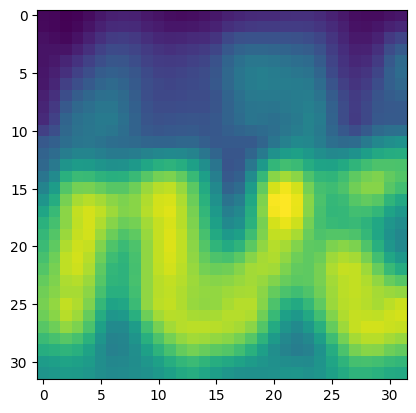

In [22]:
n = len(X)
color0 = []
color1 = []
color2 = []
col = []
for c, img in enumerate(X):
    m = numpy.mean(img)
    img = img-m
    if c==0:print(img)
    col.append(img)
    im = numpy.array(img[:,:,0])
    color0.append(im.reshape(32,32,1))
    #color0.append(img[:,:,0])
    im = numpy.array(img[:,:,1])
    #color1.append(im.reshape(32,32,1))
    color1.append(img[:,:,1])
    im = numpy.array(img[:,:,2])
    #color2.append(im.reshape(32,32,1))
    color2.append(img[:,:,2])
#y = y.reshape(n, -1)
ytr = y[:63000]
yva = y[63000:]
color0tr = numpy.array(color0[:63000])
color0va = numpy.array(color0[63000:])
color1tr = numpy.array(color1[:63000])
color1va = numpy.array(color1[63000:])
color2tr = numpy.array(color2[:63000])
color2va = numpy.array(color2[63000:])
coltr = numpy.array(col[:63000])
colva = numpy.array(col[63000:])
print(color0[0].shape)
print(ytr.shape)
plt.imshow(color2va[2])
print(yva[2])

In [23]:
inp=Input(shape=(32,32,1))
x=Conv2D(filters=32, kernel_size=(4,4), activation='relu', padding='same')(inp)
x=Dropout(0.3)(x)
x=Conv2D(filters=32, kernel_size=(4,4), activation='relu', padding='same', dilation_rate=(2,2))(x)
x=Dropout(0.3)(x)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=BatchNormalization(epsilon=0.01)(x)
x=Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(x)
x=BatchNormalization(epsilon=0.01)(x)
x=Dropout(0.3)(x)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=Conv2D(filters=64, kernel_size=(2,2), activation='relu', padding='same' )(x)
x=BatchNormalization(epsilon=0.01)(x)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same')(x)
x=BatchNormalization(epsilon=0.01)(x)
x=Dropout(0.3)(x)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
# x=Conv2D(filters = 64, kernel_size=(2,2), activation='relu', padding='same')(x)
# x=BatchNormalization(epsilon=0.01)(x)
# x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=Flatten()(x)
#x=Dense(10, activation='sigmoid')(x)
x = Dense(10, activation='softmax', kernel_regularizer='L2')(x)
mod0 = Model(inp, x)
mod0.compile(optimizer='Adam', loss='SparseCategoricalCrossentropy', metrics='accuracy')
mod0.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_8 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_37 (Conv2D)          (None, 32, 32, 32)        544       
                                                                 
 dropout_27 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_38 (Conv2D)          (None, 32, 32, 32)        16416     
                                                                 
 dropout_28 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_30 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                           

In [44]:
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', activation='relu',input_shape=(32, 32, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.3))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax',kernel_regularizer='L2'))
model.compile(optimizer='Adam', loss='SparseCategoricalCrossentropy', metrics='accuracy')

In [46]:
model.fit(color0tr, ytr, epochs=2, batch_size=256, shuffle=True, validation_data=(color0va, yva))

Epoch 1/2
247/247 [==============================] - 40s 164ms/step - loss: 0.2690 - accuracy: 0.9261 - val_loss: 0.2275 - val_accuracy: 0.9405
Epoch 2/2
247/247 [==============================] - 42s 169ms/step - loss: 0.2566 - accuracy: 0.9307 - val_loss: 0.2271 - val_accuracy: 0.9400


In [24]:
mod0.fit(color0tr, ytr, epochs=6, batch_size=64, shuffle=True, validation_data=(color0va, yva))
mod0.fit(color0tr, ytr, epochs=2, batch_size=128, shuffle=True, validation_data=(color0va, yva))
mod0.fit(color0tr, ytr, epochs=2, batch_size=256, shuffle=True, validation_data=(color0va, yva))
mod0.fit(color0tr, ytr, epochs=2, batch_size=512, shuffle=True, validation_data=(color0va, yva))

Epoch 1/6
985/985 [==============================] - 85s 86ms/step - loss: 0.9997 - accuracy: 0.7258 - val_loss: 0.6504 - val_accuracy: 0.8121
Epoch 2/6
985/985 [==============================] - 82s 84ms/step - loss: 0.4891 - accuracy: 0.8707 - val_loss: 0.4577 - val_accuracy: 0.8794
Epoch 3/6
985/985 [==============================] - 81s 82ms/step - loss: 0.3954 - accuracy: 0.8923 - val_loss: 0.3664 - val_accuracy: 0.9031
Epoch 4/6
985/985 [==============================] - 83s 84ms/step - loss: 0.3491 - accuracy: 0.9058 - val_loss: 0.3480 - val_accuracy: 0.9086
Epoch 5/6
985/985 [==============================] - 83s 85ms/step - loss: 0.3220 - accuracy: 0.9129 - val_loss: 0.3393 - val_accuracy: 0.9077
Epoch 6/6
985/985 [==============================] - 83s 84ms/step - loss: 0.3024 - accuracy: 0.9184 - val_loss: 0.3475 - val_accuracy: 0.9045
Epoch 1/2
493/493 [==============================] - 71s 144ms/step - loss: 0.2531 - accuracy: 0.9329 - val_loss: 0.2826 - val_accuracy: 0.925

In [51]:
inp=Input(shape=(32,32,1))
x=Conv2D(filters=32, kernel_size=(4,4), activation='relu', padding='same')(inp)
x=Dropout(0.3)(x)
x=Conv2D(filters=32, kernel_size=(4,4), activation='relu', padding='same', dilation_rate=(2,2))(x)
x=Dropout(0.3)(x)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=BatchNormalization(epsilon=0.01)(x)
x=Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(x)
x=BatchNormalization(epsilon=0.01)(x)
x=Dropout(0.3)(x)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=Conv2D(filters=64, kernel_size=(2,2), activation='relu', padding='same' )(x)
x=BatchNormalization(epsilon=0.01)(x)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same')(x)
x=BatchNormalization(epsilon=0.01)(x)
x=Dropout(0.3)(x)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
# x=Conv2D(filters = 64, kernel_size=(2,2), activation='relu', padding='same')(x)
# x=BatchNormalization(epsilon=0.01)(x)
# x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=Flatten()(x)
#x=Dense(10, activation='sigmoid')(x)
x = Dense(10, activation='softmax', kernel_regularizer='L2')(x)
mod1 = Model(inp, x)
mod1.compile(optimizer='Adam', loss='SparseCategoricalCrossentropy', metrics='accuracy', )
mod1.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_75 (Conv2D)          (None, 32, 32, 32)        544       
                                                                 
 dropout_55 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_76 (Conv2D)          (None, 32, 32, 32)        16416     
                                                                 
 dropout_56 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_55 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                          

In [53]:
model1 = Sequential()
model1.add(Conv2D(32, (3, 3), padding='same', activation='relu',input_shape=(32, 32, 1)))
model1.add(BatchNormalization())
model1.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.3))

model1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(Conv2D(64, (3, 3), padding='same',activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.3))

model1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(BatchNormalization())
model1.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
model1.add(MaxPooling2D((2, 2)))
model1.add(Dropout(0.3))

model1.add(Flatten())
model1.add(Dense(128, activation='relu'))
model1.add(Dropout(0.4))
model1.add(Dense(10, activation='softmax',kernel_regularizer='L2'))
model1.compile(optimizer='Adam', loss='SparseCategoricalCrossentropy', metrics='accuracy')

In [56]:
model1.fit(color1tr, ytr, epochs=3, batch_size=256, shuffle=True, validation_data=(color1va, yva))

Epoch 1/3
247/247 [==============================] - 40s 163ms/step - loss: 0.2540 - accuracy: 0.9303 - val_loss: 0.2196 - val_accuracy: 0.9430
Epoch 2/3
247/247 [==============================] - 40s 163ms/step - loss: 0.2397 - accuracy: 0.9349 - val_loss: 0.2165 - val_accuracy: 0.9451
Epoch 3/3
247/247 [==============================] - 40s 162ms/step - loss: 0.2270 - accuracy: 0.9390 - val_loss: 0.2168 - val_accuracy: 0.9438


In [26]:
mod1.fit(color1tr, ytr, epochs=6, batch_size=64, shuffle=True, validation_data=(color1va, yva))
mod1.fit(color1tr, ytr, epochs=2, batch_size=128, shuffle=True, validation_data=(color1va, yva))
mod1.fit(color1tr, ytr, epochs=2, batch_size=256, shuffle=True, validation_data=(color1va, yva))
mod1.fit(color1tr, ytr, epochs=3, batch_size=512, shuffle=True, validation_data=(color1va, yva))

Epoch 1/6
985/985 [==============================] - 80s 81ms/step - loss: 1.0210 - accuracy: 0.7203 - val_loss: 0.6074 - val_accuracy: 0.8558
Epoch 2/6
985/985 [==============================] - 80s 81ms/step - loss: 0.4868 - accuracy: 0.8711 - val_loss: 0.4704 - val_accuracy: 0.8716
Epoch 3/6
985/985 [==============================] - 80s 81ms/step - loss: 0.3887 - accuracy: 0.8947 - val_loss: 0.3782 - val_accuracy: 0.8972
Epoch 4/6
985/985 [==============================] - 79s 81ms/step - loss: 0.3449 - accuracy: 0.9063 - val_loss: 0.3392 - val_accuracy: 0.9117
Epoch 5/6
985/985 [==============================] - 80s 81ms/step - loss: 0.3145 - accuracy: 0.9155 - val_loss: 0.3407 - val_accuracy: 0.9083
Epoch 6/6
985/985 [==============================] - 79s 80ms/step - loss: 0.2924 - accuracy: 0.9219 - val_loss: 0.3126 - val_accuracy: 0.9172
Epoch 1/2
493/493 [==============================] - 68s 138ms/step - loss: 0.2480 - accuracy: 0.9342 - val_loss: 0.2781 - val_accuracy: 0.929

In [27]:
inp=Input(shape=(32,32,1))
x=Conv2D(filters=32, kernel_size=(4,4), activation='relu', padding='same')(inp)
x=Dropout(0.25)(x)
x=Conv2D(filters=32, kernel_size=(4,4), activation='relu', padding='same', dilation_rate=(2,2))(x)
x=Dropout(0.25)(x)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=BatchNormalization(epsilon=0.01)(x)
x=Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')(x)
x=BatchNormalization(epsilon=0.01)(x)
x=Dropout(0.3)(x)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=Conv2D(filters=64, kernel_size=(2,2), activation='relu', padding='same' )(x)
x=BatchNormalization(epsilon=0.01)(x)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=Conv2D(filters = 64, kernel_size=(3,3), activation='relu', padding='same')(x)
x=BatchNormalization(epsilon=0.01)(x)
x=Dropout(0.3)(x)
x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
# x=Conv2D(filters = 64, kernel_size=(2,2), activation='relu', padding='same')(x)
# x=BatchNormalization(epsilon=0.01)(x)
# x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
x=Flatten()(x)
#x=Dense(10, activation='sigmoid')(x)
x = Dense(10, activation='softmax', kernel_regularizer='L2')(x)
mod2 = Model(inp, x)
mod2.compile(optimizer='Adam', loss='SparseCategoricalCrossentropy', metrics='accuracy')
mod2.summary()

Model: "model_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_47 (Conv2D)          (None, 32, 32, 32)        544       
                                                                 
 dropout_35 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 conv2d_48 (Conv2D)          (None, 32, 32, 32)        16416     
                                                                 
 dropout_36 (Dropout)        (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_38 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                           

In [37]:
# mod2.fit(color2tr, ytr, epochs=6, batch_size=64, shuffle=True, validation_data=(color2va, yva))
# mod2.fit(color2tr, ytr, epochs=2, batch_size=128, shuffle=True, validation_data=(color2va, yva))
# mod2.fit(color2tr, ytr, epochs=2, batch_size=256, shuffle=True, validation_data=(color2va, yva))
mod2.fit(color2tr, ytr, epochs=3, batch_size=512, shuffle=True, validation_data=(color2va, yva))

Epoch 1/3
124/124 [==============================] - 59s 479ms/step - loss: 0.1849 - accuracy: 0.9520 - val_loss: 0.2824 - val_accuracy: 0.9242
Epoch 2/3
124/124 [==============================] - 60s 480ms/step - loss: 0.1815 - accuracy: 0.9530 - val_loss: 0.2906 - val_accuracy: 0.9203
Epoch 3/3
124/124 [==============================] - 94s 763ms/step - loss: 0.1859 - accuracy: 0.9504 - val_loss: 0.2915 - val_accuracy: 0.9198


In [29]:
def combine(col0,col1,col2):
    ret = []
    for c0,c1,c2 in zip(col0,col1,col2):
        t = []
        t.append((max(c0), numpy.argmax(c0)))
        t.append((max(c1), numpy.argmax(c1)))
        t.append((max(c2), numpy.argmax(c2)))
        t.sort(key=lambda x:-x[0])
        ret.append(t[0][1])
    return ret

In [58]:
col0pred = model.predict(color0va)
col1pred = model1.predict(color1va)
col2pred = mod2.predict(color2va)
predictions = combine(col0pred, col1pred, col2pred)

321/321 [==============================] - 5s 14ms/step


In [31]:
def calculateAccuracy(pred, lab):
    if len(pred)!=len(lab):
        print(f"Wrong dimentions: {len(pred)}!={len(lab)}")
        return
    else:
        n = len(pred)
        sm = sum([1 if pred[i]==lab[i] else 0 for i in range(n) ])
        return sm/n


results:

In [59]:
#accuracy score
#calculated by choosing max probability
print(f"accuracy: {calculateAccuracy(predictions, yva)}")

accuracy: 0.9469630496246466


In [33]:
# inp=Input(shape=(32,32,3))
# x=Conv2D(filters=24, kernel_size=(4,4), activation='relu', padding='same')(inp)
# x=BatchNormalization(epsilon=0.01)(x)
# x=Dropout(0.3)(x)
# x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
# x=Conv2D(filters=32, kernel_size=(4,4), activation='relu', padding='same')(inp)
# x=BatchNormalization(epsilon=0.01)(x)
# x=Dropout(0.3)(x)
# x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
# x=Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same' )(x)
# x=BatchNormalization(epsilon=0.01)(x)
# x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
# x=Conv2D(filters = 128, kernel_size=(3,3), activation='relu', padding='same')(x)
# x=BatchNormalization(epsilon=0.01)(x)
# x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
# x=Conv2D(filters = 128, kernel_size=(2,2), activation='relu', padding='same')(x)
# x=BatchNormalization(epsilon=0.01)(x)
# x=MaxPooling2D(pool_size=(2,2), padding='same')(x)
# x=Flatten()(x)
# #x=Dense(10, activation='sigmoid')(x)
# x = Dense(10, activation='softmax', kernel_regularizer='L2')(x)
# mod1 = Model(inp, x)
# mod1.compile(optimizer='Adam', loss='SparseCategoricalCrossentropy', metrics='accuracy', )
# mod1.summary()

In [34]:
#print(X[:63000].shape)

In [35]:
##mod1.fit(X, y,epochs=5, batch_size=1024, shuffle=True, validation_data=(Xt, yt) )